# SETTINGS TUNING - TRAIN - TEST EXECUTION

In [ ]:
############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr/train-k_fold_val-test"  

# SETTINGS

In [1]:
import numpy as np

############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr/train-k_fold_val-test"  


################### DATA SETTINGS #################

DATA_DIR = "data/train_data"  
# Directory where the samples (data and labels folders) and the metadata.json file are located.

METADATA_DATASET = "metadata_38_samples.json"  
# Name of the metadata.json file located in DATA_DIR, which contains the specifications of the samples and their corresponding information used to create the dataset.

TEST_PERCENTAGE_TRAIN_TEST_SPLIT = 15
# Percentage of the dataset that will be used for testing during the train-test split.

CROSS_VALIDATION_K_FOLDS = 4
# Number of folds for k-fold cross-validation

NUM_WORKERS = 4
# Number of logical CPU Cores used for parallelizing data laoding

############ TRAINING/INFERENCE SETTINGS ##########

BATCH_SIZE_TRAINING = 1
BATCH_SIZE_INFERENCE = 1 # It doesn't matter the batch size. It always processes the patches sequentially inside the batch.
ACCUMULATE_GRAD_BATCHES = 4 # Accumulate gradients over 4 batches

PATIENCE_EARLY_STOPPING = 10 #7
# Number of epochs to wait before early stopping if no improvement is observed.

MAX_TRAINING_EPOCHS = 10  
# Maximum number of epochs for training.

LEARNING_RATE = 1e-4 #1e-4
WEIGHT_DECAY = 1e-2 #1e-2
WARMUP_EPOCHS_LR_SCHEDULER = np.ceil(0.05 * MAX_TRAINING_EPOCHS)

############### DATA PROCESSING SETTINGS ##########

OVERLAP_TRAINING = [0.15, 0.15]  
# e.g., [0.25, 0.35] -> 0.25 overlap in the height dimension & 0.35 overlap in the width dimension.

OVERLAP_INFERENCE = [0, 0]  
# No overlap during inference.

################### MODEL SETTINGS #################

PATCH_DIMS = (128, 128, 64)  
# Dimensions of the patches used for model input (Height, Width, Depth).
FEATURE_SIZE = 48
# Initial embedding dimension

In [2]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# CHEKING DISK STORAGE

In [3]:
import shutil

# Get disk space details
total, used, free = shutil.disk_usage("/")

# Convert to human-readable format
def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print(f"Total Space: {format_size(total)}")
print(f"Used Space: {format_size(used)}")
print(f"Free Space: {format_size(free)}")

Total Space: 915.32 GB
Used Space: 754.97 GB
Free Space: 113.78 GB


In [4]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size, skipping broken symbolic links
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

def print_directory_size(directory):
    size_bytes = get_directory_size(directory)
    # Convert bytes to a human-readable format (KB, MB, GB)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024:
            print(f"Size of '{directory}': {size_bytes:.2f} {unit}")
            break
        size_bytes /= 1024

# Example usage
preprocessed_files_path = "data/train_data/preprocessed_files"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

preprocessed_files_path = "executions"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

Size of 'data/train_data/preprocessed_files': 4.40 GB
Size of 'executions': 45.10 GB


# CREATING EXECUTION DIRECTORY

In [5]:
import os

executions_ids = [
    int(execution_dir.split('-')[0].split('=')[1])
    for model_dir in os.listdir("executions")
    if os.path.isdir(os.path.join("executions", model_dir))  and model_dir != ".ipynb_checkpoints"
    for execution_type_dir in os.listdir(os.path.join("executions", model_dir))
    if os.path.isdir(os.path.join("executions", model_dir, execution_type_dir)) and execution_type_dir != ".ipynb_checkpoints"
    for execution_dir in os.listdir(os.path.join("executions", model_dir, execution_type_dir))
    if os.path.isdir(os.path.join("executions", model_dir, execution_type_dir, execution_dir)) and execution_dir != ".ipynb_checkpoints"
]

print(f"Total executions previously done: {len(executions_ids)}")

parent_execution_dir_path = os.path.join(PARENT_EXECUTION_DIR)

# Count the subdirectories inside parent_execution_dir_path
executions_parent_dir_count = len([
    d for d in os.listdir(parent_execution_dir_path)
    if os.path.isdir(os.path.join(parent_execution_dir_path, d)) and d != ".ipynb_checkpoints"
])

print(f"Total executions previously done ({PARENT_EXECUTION_DIR}): {executions_parent_dir_count}")

execution_id = max(executions_ids) + 1  # Assign 0 if the list is empty, otherwise the count of execution_directories

print(f"Assigned execution_id: {execution_id}")

# Format overlap values for training
formatted_overlap_training = f"{OVERLAP_TRAINING[0]:.2f}x{OVERLAP_TRAINING[1]:.2f}".replace('.', '_')

# Format overlap values for inference
formatted_overlap_inference = f"{OVERLAP_INFERENCE[0]:.2f}x{OVERLAP_INFERENCE[1]:.2f}".replace('.', '_')

# Format patch dimensions
formatted_patch_dims = f"{PATCH_DIMS[0]}x{PATCH_DIMS[1]}x{PATCH_DIMS[2]}"

# Create a unique experiment configuration identifier
experiment_config_id = (
    f"id={execution_id}-"
    f"patch_dims=[{formatted_patch_dims}]-"
    f"overlap_training=[{formatted_overlap_training}]-"
    f"batch_training=[{BATCH_SIZE_TRAINING}]"
)

# Define and create the execution directory
execution_dir = os.path.join(parent_execution_dir_path, experiment_config_id)
os.makedirs(execution_dir, exist_ok=True)

print(f"Created execution directory: {execution_dir}")


Total executions previously done: 90
Total executions previously done (executions/swin_unetr/train-k_fold_val-test): 57
Assigned execution_id: 93
Created execution directory: executions/swin_unetr/train-k_fold_val-test/id=93-patch_dims=[128x128x64]-overlap_training=[0_15x0_15]-batch_training=[1]


# GENERATING SETTINGS JSON

In [6]:
import json

# Define the settings as a dictionary
settings = {
    "EXECUTION_SETTINGS": {
        "PARENT_EXECUTION_DIR": PARENT_EXECUTION_DIR,
        # Directory where the results of this execution will be stored.
    },
    
    "DATA_SETTINGS": {
        "DATA_DIR": DATA_DIR,
        # Directory where the samples (data and labels folders) and the metadata.json file are located.
        "METADATA_DATASET": METADATA_DATASET,
        # Name of the metadata.json file located in DATA_DIR, which contains the specifications of the samples and their corresponding information used to create the dataset.
        "TEST_PERCENTAGE_TRAIN_TEST_SPLIT": TEST_PERCENTAGE_TRAIN_TEST_SPLIT,
        # Percentage of the dataset that will be used for testing during the train-test split.
        "CROSS_VALIDATION_K_FOLDS": CROSS_VALIDATION_K_FOLDS,
        # Number of folds for k-fold cross-
        "NUM_WORKERS": NUM_WORKERS, 
        # Number of logical CPU Cores used for parallelizing data laoding
    },
    
    "TRAINING_INFERENCE_SETTINGS": {
        "BATCH_SIZE_TRAINING": BATCH_SIZE_TRAINING,
        "BATCH_SIZE_INFERENCE": BATCH_SIZE_INFERENCE,
        "ACCUMULATE_GRAD_BATCHES": ACCUMULATE_GRAD_BATCHES,
        "PATIENCE_EARLY_STOPPING": PATIENCE_EARLY_STOPPING,
        # Number of epochs to wait before early stopping if no improvement is observed.
        "MAX_TRAINING_EPOCHS": MAX_TRAINING_EPOCHS,
        # Maximum number of epochs for training.
        "LEARNING_RATE": LEARNING_RATE,
        "WEIGHT_DECAY": WEIGHT_DECAY,
        "WARMUP_EPOCHS_LR_SCHEDULER": WARMUP_EPOCHS_LR_SCHEDULER,  # Since MAX_TRAINING_EPOCHS = 10
    },
    
    "DATA_PROCESSING_SETTINGS": {
        "OVERLAP_TRAINING": OVERLAP_TRAINING,
        "OVERLAP_INFERENCE": OVERLAP_INFERENCE,
    },
    
    "MODEL_SETTINGS": {
        "PATCH_DIMS": PATCH_DIMS,
        "FEATURE_SIZE": FEATURE_SIZE,
    }
}

settings_json_file_path = os.path.join(execution_dir, "settings.json")

# Save the dictionary as a pretty JSON file
with open(settings_json_file_path, "w") as json_file:
    json.dump(settings, json_file, indent=4)

# Print success message
print(f"Settings JSON file successfully generated at: {settings_json_file_path}")

Settings JSON file successfully generated at: executions/swin_unetr/train-k_fold_val-test/id=93-patch_dims=[128x128x64]-overlap_training=[0_15x0_15]-batch_training=[1]/settings.json


# DATA SPLITTING

In [7]:
import sys
import importlib

# Import the whole module 'lr_schedulers'
import utils.data_splitter

# Reload the 'lr_schedulers' module
importlib.reload(utils.data_splitter)

# Now, you can import the class from the reloaded module
from utils.data_splitter import load_metadata, stratified_split, k_fold_stratified_split
import os

#Load metadata into a dict
metadata = load_metadata(os.path.join(DATA_DIR, METADATA_DATASET))
# Perform stratified split
train_files, test_files = stratified_split(metadata, test_size = TEST_PERCENTAGE_TRAIN_TEST_SPLIT/100)
k_fold_training_splits = k_fold_stratified_split(train_files, k=CROSS_VALIDATION_K_FOLDS)


==================== 85.0-15.0 TRAINING/TESTING SPLIT ====================


==========> TRAINING/VALIDATION SET

 SAMPLES: dict_keys(['Z_017', 'R_009', 'R_010', 'Z_008', 'R_019', 'Z_005', 'R_018', 'R_004', 'Z_020', 'Z_006', 'Z_009', 'Z_019', 'R_002', 'R_013', 'R_015', 'R_020', 'R_011', 'Z_018', 'R_014', 'Z_015', 'R_007', 'Z_007', 'Z_014', 'Z_010', 'R_006', 'Z_004', 'R_003', 'Z_016', 'Z_011', 'R_017', 'Z_012', 'R_005'])

==========> TESTING SET

 SAMPLES: dict_keys(['R_012', 'R_008', 'Z_002', 'Z_013', 'Z_003', 'R_016'])


==================== 4-FOLD TRAINING/VALIDATION SPLIT ====================


==================== SPLIT: 0 ====================

==========> TRAINING SET

 SAMPLES: dict_keys(['R_009', 'R_019', 'Z_005', 'R_018', 'R_004', 'Z_020', 'Z_006', 'Z_009', 'Z_019', 'R_002', 'R_013', 'R_011', 'Z_018', 'R_014', 'R_007', 'Z_007', 'Z_014', 'Z_010', 'R_006', 'Z_004', 'R_003', 'Z_016', 'Z_012', 'R_005'])

==========> VALIDATION SET

 SAMPLES: dict_keys(['Z_017', 'R_010', 'Z_008', '

# Import SwinUNETR_AIRT LIGHTNING MODEL

In [8]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_lightning_model

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_lightning_model)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_lightning_model import SwinUNETR_AIRT_LightningModel

All imports succeeded!
All imports succeeded!
All imports succeeded!
All imports succeeded!
All imports succeeded!
All imports succeeded!
All imports succeeded!
All imports succeeded!


# Import SwinUNETR_AIRT DATASET

In [9]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_dataset

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_dataset)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_dataset import SwinUNETR_AIRT_Dataset


All imports succeeded!
All imports succeeded!


# TRAINING


==================== SPLIT: 0 ====================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_009', 'R_019', 'Z_005', 'R_018', 'R_004', 'Z_020', 'Z_006', 'Z_009', 'Z_019', 'R_002', 'R_013', 'R_011', 'Z_018', 'R_014', 'R_007', 'Z_007', 'Z_014', 'Z_010', 'R_006', 'Z_004', 'R_003', 'Z_016', 'Z_012', 'R_005'])



==> DATA PREPOCESSING AND LOADING STARTS

Processing & loading sample R_009 ...

The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/R_009/measurement/depth[64]/patches/patch_size[128x128]' did not exist and has been created.
File was generated and saved successfully: /home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/R_009/measurement/depth[64]/patches/patch_size[128x128]/R_009_cropped[185x180]_standarized_depth[64].raw
The label corresponding to 'R_009' sample has already been processed with patch size [128x128] and overlap [0_15x0_15]
The dir

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


File was generated and saved successfully: /home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/R_017/measurement/depth[64]/patches/patch_size[128x128]/R_017_cropped[185x181]_standarized_depth[64].raw
The label corresponding to 'R_017' sample has already been processed with patch size [128x128] and overlap [0_00x0_00]
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/R_017/measurement/depth[64]/patches/patch_size[128x128]/overlap[0_00x0_00]' did not exist and has been created.


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING AND LOADING FINISHED



========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 62.2 M | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
62.2 M    Trainable params
0         Non-trainable params
62.2 M    Total params
248.747   Total estimated model params size (MB)
273       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.923025

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.040936

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.078647

==> (VALIDATION) Average FPR (include_background=[False]): 0.870363



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.939957

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.032275

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.061883

==> (VALIDATION) Average FPR (include_background=[False]): 0.871281

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.930216
Finished training epoch 0

Starting training epoch 1...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.533046

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.404830

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.558920

==> (VALIDATION) Average FPR (include_background=[False]): 0.043917

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.728040
Finished training epoch 1

Starting training epoch 2...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.490695

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.378186

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.513959

==> (VALIDATION) Average FPR (include_background=[False]): 0.001078

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.408218
Finished training epoch 2

Starting training epoch 3...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.328178

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.557594

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.701094

==> (VALIDATION) Average FPR (include_background=[False]): 0.017089

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.354980
Finished training epoch 3

Starting training epoch 4...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.291066

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.588595

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.731052

==> (VALIDATION) Average FPR (include_background=[False]): 0.011691

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.305827
Finished training epoch 4

Starting training epoch 5...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.299324

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.574019

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.713780

==> (VALIDATION) Average FPR (include_background=[False]): 0.011428

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.286722
Finished training epoch 5

Starting training epoch 6...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.259938

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.619104

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.752075

==> (VALIDATION) Average FPR (include_background=[False]): 0.006665

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.263639
Finished training epoch 6

Starting training epoch 7...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.247660

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.639266

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.768125

==> (VALIDATION) Average FPR (include_background=[False]): 0.008059

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.260621
Finished training epoch 7

Starting training epoch 8...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.245337

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.638059

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.766994

==> (VALIDATION) Average FPR (include_background=[False]): 0.006611

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.244375
Finished training epoch 8

Starting training epoch 9...


Validation: |                                                                                                 …

==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.242958

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.642262

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.770178

==> (VALIDATION) Average FPR (include_background=[False]): 0.007307

==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.233316
Finished training epoch 9



`Trainer.fit` stopped: `max_epochs=10` reached.


Training completed in 0h 10m 3s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Plot saved at: executions/swin_unetr/train-k_fold_val-test/id=93-patch_dims=[128x128x64]-overlap_training=[0_15x0_15]-batch_training=[1]/split_0/loss-evol_id=93-patch_dims=[128x128x64]-overlap_training=[0_15x0_15]-batch_training=[1].png


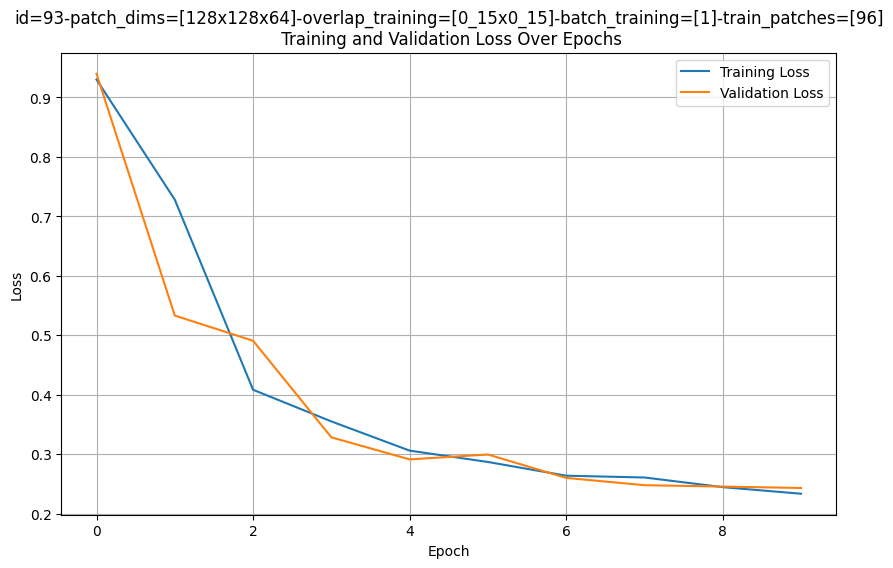


========== PLOTTING BEST_CHECKPOINT RESULTS ==========



KeyboardInterrupt: 

In [10]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import pandas as pd
import time
import shutil
import gc

def custom_collate(batch):
    # Collect x (dictionaries) into a list
    batch_sample_ids = [item[0] for item in batch]
    # Collect x (dictionaries) into a list
    batch_x = [item[1] for item in batch]
    # Collect y (strings) into a list
    batch_y = [item[2] for item in batch]

    return batch_sample_ids, batch_x, batch_y

training_times_splits = []
validation_losses_splits = []
best_split_validation_loss = 1
best_split = None

# Measure start training time
start_execution_time = time.time()

for split_idx, (train_files, validation_files) in enumerate(k_fold_training_splits):

    # Clear the GPU cache between splits
    torch.cuda.empty_cache()
    
    ####################################################################################
    ############################# DATA PREPARATION #####################################
    ####################################################################################
    
    print()
    print(f"{'=' * 50}")
    print(f"{'=' * 20} SPLIT: {split_idx} {'=' * 20}")
    print(f"{'=' * 50}")
    print()

    print()
    print(f"{'=' * 15}> TRAINING DATA PREPARATION")
    print()

    print(f" SAMPLES: {train_files.keys()}")
    print()
    print()
    print()
    
    train_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = False,
        metadata_dict_with_files_selected=train_files,
        data_dir=DATA_DIR,
        model_input_dim=PATCH_DIMS,
        overlap = OVERLAP_TRAINING
    )

    print()
    print()
    print(f"{'=' * 15}> VALIDATION DATA PREPARATION")
    print()

    print(f" SAMPLES: {validation_files.keys()}")
    print()
    print()
    print()
    
    val_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = True,
        metadata_dict_with_files_selected=validation_files,
        data_dir=DATA_DIR,
        model_input_dim=PATCH_DIMS,
        overlap = OVERLAP_INFERENCE
    )
       
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAINING, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE_INFERENCE, collate_fn=custom_collate, num_workers=NUM_WORKERS)

    print()

    ####################################################################################
    ############################# TRAINER SETTING ######################################
    ####################################################################################
     
    # Model checkpoint callback
    split_dir = os.path.join(execution_dir, f"split_{split_idx}")
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath=split_dir,
        filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
        save_top_k=1,
        mode='min'
    )
    
    # Early stopping callback
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=PATIENCE_EARLY_STOPPING,
        mode='min'
    )
    
    # Define logger
    logger = CSVLogger(
        save_dir=split_dir,
        name="",
        version="")
    
    trainer = Trainer(
        max_epochs=MAX_TRAINING_EPOCHS,
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=1, # log every n batches
        logger=logger,
        precision="16-mixed",  # Enable FP16 mixed precision
        accumulate_grad_batches=ACCUMULATE_GRAD_BATCHES
    )
    

    ####################################################################################
    ############################### TRAINING ###########################################
    ####################################################################################

    print()
    print(f"{'=' * 10} TRAINING STARTS {'=' * 10}")
    print()
            
    # Measure start training time
    start_time = time.time()
    
    # Define and initilize model
    model = SwinUNETR_AIRT_LightningModel(
        patch_dimensions = PATCH_DIMS,
        feature_size = FEATURE_SIZE,
        lr_optimizer = LEARNING_RATE,
        weight_decay_optimizer = WEIGHT_DECAY,
        warmup_epochs_lr_scheduler = WARMUP_EPOCHS_LR_SCHEDULER
    )
    # Fit the model
    trainer.fit(model, train_loader, val_loader)
    
    # Measure end training time
    end_time = time.time()
    
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time

    training_times_splits.append(elapsed_time)
    
    print(f"Training completed in {elapsed_time // 3600:.0f}h {elapsed_time % 3600 // 60:.0f}m {elapsed_time % 60:.0f}s")

    print()
    print(f"{'=' * 10} TRAINING FINISHED {'=' * 10}")
    print()
    
    ####################################################################################
    ################## PLOTTING TRAINING & VALIDATION LOSSES ###########################
    ####################################################################################

    print()
    print(f"{'=' * 10} PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION {'=' * 10}")
    print()
    
    # Path to the latest metrics file
    metrics_file = os.path.join(split_dir, 'metrics.csv')
    
    # Load the logged metrics
    metrics_df = pd.read_csv(metrics_file)
    
    # Ensure metrics_df is loaded
    # Filter rows where train_loss_epoch and val_loss_epoch are not NaN
    train_loss = metrics_df['train_loss_epoch'].dropna()
    val_loss = metrics_df['val_loss_epoch'].dropna()
    
    # Use the 'epoch' column as x-axis
    epochs_train = metrics_df.loc[metrics_df['train_loss_epoch'].notna(), 'epoch']
    epochs_val = metrics_df.loc[metrics_df['val_loss_epoch'].notna(), 'epoch']
    
    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_train, train_loss, label="Training Loss")
    plt.plot(epochs_val, val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(experiment_config_id + "-train_patches=[" + str(len(train_dataset)) + "]" + "\n Training and Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    
    # Save the plot to the folder
    save_path = os.path.join(split_dir, f"loss-evol_{experiment_config_id}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
    print(f"Plot saved at: {save_path}")
    
    plt.show()
    
    ####################################################################################
    ###################### PLOTTING BEST_CHECKPOINT RESULTS ############################
    ####################################################################################
    
    print()
    print(f"{'=' * 10} PLOTTING BEST_CHECKPOINT RESULTS {'=' * 10}")
    print()
    
    # Path to the best checkpoint
    best_checkpoint_path = checkpoint_callback.best_model_path
    
    # Extract the best epoch number from the checkpoint filename
    best_epoch = float(best_checkpoint_path.split("best-checkpoint-")[1].split("epoch=")[1].split("-")[0]) # best-checkpoint-epoch=02-val_loss=0.85
    
    # Get metrics for the best epoch
    metrics_for_best_epoch = metrics_df.loc[metrics_df['epoch'] == best_epoch]
    val_loss_epoch = metrics_for_best_epoch.loc[metrics_for_best_epoch['val_loss_epoch'].notna(), 'val_loss_epoch'].values[0]
    val_mean_iou_epoch = metrics_for_best_epoch.loc[metrics_for_best_epoch['val_mean_iou_epoch'].notna(), 'val_mean_iou_epoch'].values[0]
    val_dice_epoch = metrics_for_best_epoch.loc[metrics_for_best_epoch['val_dice_epoch'].notna(), 'val_dice_epoch'].values[0]
    val_fpr_epoch = metrics_for_best_epoch.loc[metrics_for_best_epoch['val_fpr_epoch'].notna(), 'val_fpr_epoch'].values[0]
    
    # Titles for the plots
    plot_title_template = (
        f"Epoch: {best_epoch:.1f}, "
        f"val_loss_epoch: {val_loss_epoch:.4f}, "
        f"val_mean_iou_epoch: {val_mean_iou_epoch:.4f}, "
        f"val_dice_epoch: {val_dice_epoch:.4f}, "
        f"val_fpr_epoch: {val_fpr_epoch:.4f}"
    )
    
    # Load the best checkpoint
    best_model = SwinUNETR_AIRT_LightningModel.load_from_checkpoint(
        checkpoint_path=best_checkpoint_path,
        patch_dimensions=PATCH_DIMS,  # Manually pass required arguments
        feature_size = FEATURE_SIZE,
        lr_optimizer = LEARNING_RATE,
        weight_decay_optimizer = WEIGHT_DECAY,
        warmup_epochs_lr_scheduler = WARMUP_EPOCHS_LR_SCHEDULER
    )
    best_model.eval()  # Set model to evaluation mode
    best_model.freeze()  # Freeze the model
    
    # Initialize lists to collect all results
    all_ground_truth = []
    all_predictions = []
    all_sample_ids = []
    
    # Inference on validation set
    for batch_idx, batch in enumerate(val_loader):
        ids, x, y = batch  # x format: list of sampel_ids (one per sample in the batch), list of dict_patches (one per sample in the batch), y format: list of label_paths (one per sample in the batch)        

        #############################   COMPUTING PREDICTIONS   #############################################

        for sample_id, sample_x, sample_y in zip(ids, x, y):

            # Load ground truth
            ##############  LOADING Y   ###############
            y_filename = sample_y[0]
            y_tensor_shape = sample_y[1]
            # Load the raw data into a NumPy array
            loaded_array_y = np.fromfile(y_filename, dtype=np.float32)           
            # Reshape the loaded array to the original shape
            loaded_array_y = loaded_array_y.reshape(y_tensor_shape)           
            # Convert back to a PyTorch tensor
            y = torch.from_numpy(loaded_array_y).to(best_model.device)
            ##########################################
            
            #y = torch.load(sample_y, weights_only=True).to(best_model.device)  # Move to the correct device
            y = y.unsqueeze(0)  # Add 1 dimension to match model output format
    
            # Create a tensor filled with NaN values
            y_hat = torch.empty_like(y).fill_(float('nan')).to(best_model.device)
            patches_dict_info = sample_x
    
            for patch_key in list(patches_dict_info.keys()):
                patch_coordinates = patches_dict_info[patch_key]["patch_coord"]
                patch_path = patches_dict_info[patch_key]["patch_path"]

                ##############  LOADING patch_tensor   ###############
                patch_tensor_shape = patches_dict_info[patch_key]["patch_tensor_shape"]
                # Load the raw data into a NumPy array
                loaded_array_patch_tensor = np.fromfile(patch_path, dtype=np.float32)           
                # Reshape the loaded array to the original shape
                loaded_array_patch_tensor = loaded_array_patch_tensor.reshape(patch_tensor_shape)           
                # Convert back to a PyTorch tensor
                patch_tensor = torch.from_numpy(loaded_array_patch_tensor).to(best_model.device)
                ##########################################
                
                #patch_tensor = torch.load(patch_path, weights_only=True).to(best_model.device)
                patch_tensor = patch_tensor.unsqueeze(0)  # Match model input format
                patch_prediction = best_model(patch_tensor)
    
                # Fill y_hat with patch predictions
                for i in range(patch_coordinates[0], patch_coordinates[0] + best_model.patch_dimensions[0]):
                    for j in range(patch_coordinates[1], patch_coordinates[1] + best_model.patch_dimensions[1]):
                        is_pixel_without_prediction = torch.isnan(y_hat[:, :, i, j]).any()
                        if is_pixel_without_prediction:
                            y_hat[:, :, i, j] = patch_prediction[:, :, i - patch_coordinates[0], j - patch_coordinates[1]]
    
            # Apply softmax to probabilities (POST-PROCESSING)
            y_hat_probabilities = F.softmax(y_hat, dim=1)
    
            # Classify each pixel accoring to probabilties assigning the class with higher probabilty
            y_hat_categorized = torch.argmax(y_hat_probabilities.squeeze(), dim=0)
            # Convert y one_encoded into categorized tensor
            y = torch.argmax(y.squeeze(), dim=0)
    
            # Append to the global list
            all_sample_ids.append(sample_id)
            all_ground_truth.append(y)
            all_predictions.append(y_hat_categorized)
    
    # Find unique classes dynamically
    all_classes = set()
    for gt, pred in zip(all_ground_truth, all_predictions):
        all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
        all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
    
    # Sort the classes to ensure order
    all_classes = sorted(all_classes)
    
    # Define class labels dynamically (for simplicity, use numeric labels for now)
    class_labels = {cls: f"Class {cls}" for cls in all_classes}
    num_classes = len(class_labels)
    
    # Create a discrete colormap with exactly `num_classes` colors
    colormap = plt.cm.get_cmap("viridis", num_classes)
    
    # Create legend patches using discrete colors from the colormap
    legend_patches = [
        mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
        for i, label in class_labels.items()
    ]
    
    # Plot all results together
    num_samples = len(all_ground_truth)
    
    # Create the figure
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))
    
    # Ensure axes is always 2D
    if num_samples == 1:
        axes = axes[None, :]  # Ensure axes is 2D when there's only one sample
    
    # Plot ground truth and predictions
    for sample_idx, (sample_id, ground_truth, prediction) in enumerate(zip(all_sample_ids, all_ground_truth, all_predictions)):
        # Ground truth
        im_gt = axes[sample_idx, 0].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none", vmin=min(all_classes), vmax=max(all_classes))
        axes[sample_idx, 0].set_title(f"Sample {sample_id} - Ground Truth")
        axes[sample_idx, 0].axis("off")
    
        # Prediction
        im_pred = axes[sample_idx, 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none", vmin=min(all_classes), vmax=max(all_classes))
        axes[sample_idx, 1].set_title(f"Sample {sample_id} - Prediction")
        axes[sample_idx, 1].axis("off")
    
    # Add a single legend for the entire figure
    fig.legend(
        handles=legend_patches,
        loc="upper center",
        ncol=num_classes,
        bbox_to_anchor=(0.5, 1.02),
        fontsize=12
    )
    
    # Add a title for the entire figure
    fig.suptitle("RESULTS BEST CHECKPOINT\n" + plot_title_template, fontsize=16, y=1.10)
    plt.tight_layout()
    
    # Save the combined plot
    combined_plot_path = os.path.join(split_dir, f"results_{best_checkpoint_path.split('/')[-1]}.png")
    plt.savefig(combined_plot_path, dpi=300, bbox_inches="tight")
    plt.show()
    
    plt.close(fig)

    del y
    del y_hat
    del patch_tensor
    del model
    del best_model
    del trainer
    torch.cuda.empty_cache()
    gc.collect()    

    ####################################################################################
    ############################ SPLIT PERFORMANCE COMPARISON ###########################
    ####################################################################################

    validation_losses_splits.append(val_loss_epoch)
    if val_loss_epoch < best_split_validation_loss:
        best_split = split_idx
        best_split_validation_loss = val_loss_epoch
        
        # Generate the directory name to keep
        # keep_dir_name = f"split_{best_split}"        
        # # Iterate through the items in the base directory
        # for item in os.listdir(execution_dir):
        #     item_path = os.path.join(execution_dir, item)         
        #     # Check if the item is a directory and not the one we want to keep
        #     if os.path.isdir(item_path) and item != keep_dir_name:
        #         try:
        #             # Remove the directory and its contents
        #             shutil.rmtree(item_path)
        #         except Exception as e:
        #             print(f"Failed to delete {item_path}. Reason: {e}")        
        # print("New best split updated in execution folder")

# Measure end training time
end_execution_time = time.time()
    
# Calculate and print the elapsed time
elapsed_execution_time = end_execution_time - start_execution_time

####################################################################################
############################ ANALYSING SPLIT PERFORMANCE ############################
####################################################################################

# Number of splits
splits = np.arange(len(training_times_splits))

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Training Times
ax1.bar(splits, training_times_splits, color='lightgrey', label='Training Time (s)')
ax1.set_xlabel("Split Index")
ax1.set_ylabel("Training Time (seconds)", color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Line plot for Validation Losses
ax2 = ax1.twinx()
ax2.plot(splits, validation_losses_splits, marker='o', color='blue', label='Validation Loss')
ax2.scatter(best_split, best_split_validation_loss, color='red', s=100, zorder=3, label=f'Best Split (Split {best_split})')
ax2.set_ylabel("Validation Loss", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Compute mean and standard deviation
avg_validation_loss = np.mean(validation_losses_splits)
std_dev_validation_loss = np.std(validation_losses_splits, ddof=1)  # Use ddof=1 for sample standard deviation

# Compute Coefficient of Variation (CV)
cv_validation_loss = (std_dev_validation_loss / avg_validation_loss) * 100

plot_title = (
    experiment_config_id + "-train_patches=[" + str(len(train_dataset)) + "]\n"
    "Training Times and Validation Losses Across Splits\n"
    f"Complete Execution Time (Including Plotting): {elapsed_execution_time // 3600:.0f}h {elapsed_execution_time % 3600 // 60:.0f}m {elapsed_execution_time % 60:.0f}s\n"
    f"Best Split: {best_split} - Validation Loss: {best_split_validation_loss:.4f}\n"
    f"Averaged Validation Loss: {avg_validation_loss:.4f} - Coefficient of Variation (CV): {cv_validation_loss:.2f}%"
)

# Title and Grid
fig.suptitle(plot_title,)
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.017, 1.00))
ax1.grid(True)

# Save the combined plot
plot_path = os.path.join(execution_dir, f"splits_comparison.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()
    
plt.close(fig)



# TESTING

In [ ]:
import glob

####################################################################################
################################### DATA PREPARATION ###############################
####################################################################################

print()
print(f"{'=' * 10} TESTING DATA PREPARATION {'=' * 10}")
print()

print(f" SAMPLES: {test_files.keys()}")
print()

test_dataset = SwinUNETR_AIRT_Dataset(
    is_inference_mode = True,
    metadata_dict_with_files_selected=test_files,
    data_dir=DATA_DIR,
    model_input_dim=PATCH_DIMS,
    overlap = OVERLAP_INFERENCE
)
   
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_INFERENCE, collate_fn=custom_collate, num_workers=NUM_WORKERS)

####################################################################################
############################# TRAINER SETTING ######################################
####################################################################################

# Define logger
logger = CSVLogger(
    save_dir=execution_dir,
    name="",
    version="")

trainer = Trainer(
    logger=logger)

####################################################################################
############################## TESTING #############################################
####################################################################################

print()
print(f"{'=' * 10} TESTING STARTS {'=' * 10}")
print()
        
# Measure start training time
start_time = time.time()

# Specify the directory path
best_split_dir = os.path.join(execution_dir, f"split_{best_split}")

# Find all .ckpt files in the directory
ckpt_files = [filename for filename in os.listdir(best_split_dir) if filename.endswith('.ckpt')]

# Handle different cases
if not ckpt_files:
    raise FileNotFoundError(f"No .ckpt file found in the directory: {best_split_dir}")
elif len(ckpt_files) > 1:
    raise RuntimeError(f"Multiple .ckpt files found in the directory: {best_split_dir} -> {ckpt_files}")
else:
    model_checkpoint_path = os.path.join(best_split_dir, ckpt_files[0])
    print(f"Found checkpoint: {model_checkpoint_path}")

# Load the best model
best_model = SwinUNETR_AIRT_LightningModel.load_from_checkpoint(
    checkpoint_path=model_checkpoint_path,
    patch_dimensions=PATCH_DIMS,  # Manually pass required arguments
    feature_size = FEATURE_SIZE,
    lr_optimizer = LEARNING_RATE,
    weight_decay_optimizer = WEIGHT_DECAY,
    warmup_epochs_lr_scheduler = WARMUP_EPOCHS_LR_SCHEDULER
)

test_results = trainer.test(best_model, dataloaders=test_loader)[0]

# Measure end training time
end_time = time.time()

# Calculate and print the elapsed time
testing_elapsed_time = end_time - start_time

print(f"Testing completed in {testing_elapsed_time // 3600:.0f}h {testing_elapsed_time % 3600 // 60:.0f}m {testing_elapsed_time % 60:.0f}s")

print()
print(f"{'=' * 10} TESTING FINISHED {'=' * 10}")
print()


####################################################################################
############################## PLOTTING TEST RESULTS ###############################
####################################################################################

test_ground_truths = best_model.test_ground_truths
test_predictions = best_model.test_predictions
test_sample_ids = best_model.test_sample_ids
test_loss = test_results["test_loss_epoch"]
test_mean_iou = test_results["test_mean_iou_epoch"]
test_dice_coeff = test_results["test_dice_epoch"]
test_fpr = test_results["test_fpr_epoch"]

# Find unique classes dynamically
all_classes = set()
for gt, pred in zip(test_ground_truths, test_predictions):
    all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
    all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions

# Sort the classes to ensure order
all_classes = sorted(all_classes)

# Define class labels dynamically (for simplicity, use numeric labels for now)
class_labels = {cls: f"Class {cls}" for cls in all_classes}
num_classes = len(class_labels)

# Create a discrete colormap with exactly `num_classes` colors
colormap = plt.cm.get_cmap("viridis", num_classes)

# Create legend patches using discrete colors from the colormap
legend_patches = [
    mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
    for i, label in class_labels.items()
]

# Plot all results together
num_samples = len(test_ground_truths)


# Create the figure
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

# Ensure axes is always 2D
if num_samples == 1:
    axes = axes[None, :]  # Ensure axes is 2D when there's only one sample

# Plot ground truth and predictions
for sample_idx, (sample_id, ground_truth, prediction) in enumerate(zip(test_sample_ids, test_ground_truths, test_predictions)):
    # Ground truth
    im_gt = axes[sample_idx, 0].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none", vmin=min(all_classes), vmax=max(all_classes))
    axes[sample_idx, 0].set_title(f"Sample {sample_id} - Ground Truth")
    axes[sample_idx, 0].axis("off")

    # Prediction
    im_pred = axes[sample_idx, 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none", vmin=min(all_classes), vmax=max(all_classes))
    axes[sample_idx, 1].set_title(f"Sample {sample_id} - Prediction")
    axes[sample_idx, 1].axis("off")

# Add a single legend for the entire figure
fig.legend(
    handles=legend_patches,
    loc="upper center",
    ncol=num_classes,
    bbox_to_anchor=(0.5, 0.99),
    fontsize=12
)

# Titles for the plots
plot_title_template = (
    f"Testing Execution Time (without Plotting): {testing_elapsed_time // 3600:.0f}h {testing_elapsed_time % 3600 // 60:.0f}m {testing_elapsed_time % 60:.0f}s\n"
    f"test_loss: {test_loss:.4f}, "
    f"test_mean_iou: {test_mean_iou:.4f}, "
    f"test_dice_coeff: {test_dice_coeff:.4f}, "
    f"test_fpr: {test_fpr:.4f} "
)

# Add a title for the entire figure
fig.suptitle(f"TESTING RESULTS (Model from best split = {best_split})\n" + plot_title_template, fontsize=16, y=1.03)
plt.tight_layout()

# Save the combined plot
combined_plot_path = os.path.join(execution_dir, f"test_results_model_best_split[{best_split}].png")
plt.savefig(combined_plot_path, dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)
